In [1]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from folium import Marker
from sklearn.linear_model import LinearRegression

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data-july-2023', '*'))
temp_dir

['temperature-data-july-2023/#006 2023-07-27 09_02_21 MDT (Data MDT).csv',
 'temperature-data-july-2023/planitgeo_cover_data .csv',
 'temperature-data-july-2023/#044A_Jul_27_2023_09_25_00.csv',
 'temperature-data-july-2023/#012 2023-07-27 15_59_03 MDT (Data MDT).csv',
 'temperature-data-july-2023/#007 2023-07-27 08_57_01 MDT (Data MDT).csv',
 'temperature-data-july-2023/#004 2023-07-26 16_45_41 MDT (Data MDT).csv',
 'temperature-data-july-2023/#001 2023-07-26 16_03_44 MDT (Data MDT).csv',
 'temperature-data-july-2023/#009 2023-07-26 11_40_53 MDT (Data MDT).csv',
 'temperature-data-july-2023/#027 2023-07-27 15_04_27 MDT (Data MDT).csv',
 'temperature-data-july-2023/#014 2023-07-27 14_56_57 MDT (Data MDT).csv',
 'temperature-data-july-2023/#022 2023-07-27 10_30_57 MDT (Data MDT).csv',
 'temperature-data-july-2023/#042 2023-07-19 13_42_35 MDT (Data MDT).csv',
 'temperature-data-july-2023/#008 2023-07-26 10_12_54 MDT (Data MDT).csv',
 'temperature-data-july-2023/#003 2023-07-26 16_37_06 MD

In [4]:
# Import one csv file.
def import_temp_csv(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """
                                                                                                        
    # Read csv and make the date time column the index.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv


sensor_001 = import_temp_csv(
    'temperature-data-july-2023/#001 2023-07-26 16_03_44 MDT (Data MDT).csv')
sensor_002 = import_temp_csv(
    'temperature-data-july-2023/#002 2023-07-26 16_20_51 MDT (Data MDT).csv')
sensor_003 = import_temp_csv(
    'temperature-data-july-2023/#003 2023-07-26 16_37_06 MDT (Data MDT).csv')
sensor_004 = import_temp_csv(
    'temperature-data-july-2023/#004 2023-07-26 16_45_41 MDT (Data MDT).csv')
sensor_005 = import_temp_csv(
    'temperature-data-july-2023/#005 2023-07-27 09_10_26 MDT (Data MDT).csv')
sensor_006 = import_temp_csv(
    'temperature-data-july-2023/#006 2023-07-27 09_02_21 MDT (Data MDT).csv')
sensor_007 = import_temp_csv(
    'temperature-data-july-2023/#007 2023-07-27 08_57_01 MDT (Data MDT).csv')
sensor_008 = import_temp_csv(
    'temperature-data-july-2023/#008 2023-07-26 10_12_54 MDT (Data MDT).csv')
sensor_009 = import_temp_csv(
    'temperature-data-july-2023/#009 2023-07-26 11_40_53 MDT (Data MDT).csv')
sensor_010 = import_temp_csv(
    'temperature-data-july-2023/#010 2023-07-27 16_31_28 MDT (Data MDT).csv')
sensor_011 = import_temp_csv(
     'temperature-data-july-2023/#011 2023-07-27 16_10_01 MDT (Data MDT).csv')
sensor_012 = import_temp_csv(
     'temperature-data-july-2023/#012 2023-07-27 15_59_03 MDT (Data MDT).csv')
sensor_013 = import_temp_csv(
    'temperature-data-july-2023/#013 2023-07-27 15_46_42 MDT (Data MDT).csv')
sensor_014 = import_temp_csv(
    'temperature-data-july-2023/#014 2023-07-27 14_56_57 MDT (Data MDT).csv')
sensor_015 = import_temp_csv(
     'temperature-data-july-2023/#015 2023-07-27 14_47_01 MDT (Data MDT).csv')
sensor_016 = import_temp_csv( 
     'temperature-data-july-2023/#016 2023-07-27 11_07_55 MDT (Data MDT).csv')
sensor_017 = import_temp_csv( 
    'temperature-data-july-2023/#017 2023-07-27 16_18_24 MDT (Data MDT).csv')
sensor_018 = import_temp_csv(
    'temperature-data-july-2023/#018 2023-07-27 13_31_24 MDT (Data MDT).csv')
sensor_019 = import_temp_csv(
    'temperature-data-july-2023/#019 2023-07-20 09_56_28 MDT (Data MDT).csv')
sensor_020 = import_temp_csv(
     'temperature-data-july-2023/#020 2023-07-27 11_26_09 MDT (Data MDT).csv')
sensor_021 = import_temp_csv(
    'temperature-data-july-2023/#021 2023-07-27 10_51_59 MDT (Data MDT).csv')
sensor_022 = import_temp_csv(
    'temperature-data-july-2023/#022 2023-07-27 10_30_57 MDT (Data MDT).csv')
sensor_023 = import_temp_csv(
    'temperature-data-july-2023/#023 2023-07-27 10_12_17 MDT (Data MDT).csv')
sensor_024 = import_temp_csv(
     'temperature-data-july-2023/#024 2023-07-27 09_59_43 MDT (Data MDT).csv')
sensor_025 = import_temp_csv(
    'temperature-data-july-2023/#025 2023-07-27 09_53_14 MDT (Data MDT).csv')
sensor_026 = import_temp_csv(
    'temperature-data-july-2023/#026 2023-07-19 12_37_31 MDT (Data MDT).csv')
sensor_027 = import_temp_csv(
    'temperature-data-july-2023/#027 2023-07-27 15_04_27 MDT (Data MDT).csv')
sensor_028 = import_temp_csv(
    'temperature-data-july-2023/#028 2023-07-27 15_24_45 MDT (Data MDT).csv')
sensor_029 = import_temp_csv(
    'temperature-data-july-2023/#029 2023-07-27 15_12_52 MDT (Data MDT).csv')
sensor_030a = import_temp_csv(
     'temperature-data-july-2023/#030 2023-07-06 16_04_11 MDT (Data MDT).csv')
sensor_030b = import_temp_csv(
    'temperature-data-july-2023/#030 replacement  2023-07-27 16_39_11 MDT (Data MDT).csv')
sensor_031 = import_temp_csv(
    'temperature-data-july-2023/#031 2023-07-26 14_58_30 MDT (Data MDT).csv')
sensor_035 = import_temp_csv(
    'temperature-data-july-2023/#035 2023-07-26 15_52_04 MDT (Data MDT).csv')
sensor_036 = import_temp_csv(
    'temperature-data-july-2023/#036 2023-07-26 15_20_32 MDT (Data MDT).csv')
sensor_037 = import_temp_csv(
    'temperature-data-july-2023/#037 2023-07-20 08_31_09 MDT (Data MDT).csv')
sensor_038 = import_temp_csv (
    'temperature-data-july-2023/#038 2023-07-19 10_30_13 MDT (Data MDT).csv')
sensor_039 =  import_temp_csv(
    'temperature-data-july-2023/#039 replacement  2023-07-27 15_37_41 MDT (Data MDT).csv')
sensor_040 = import_temp_csv(
    'temperature-data-july-2023/#040 2023-07-26 14_45_51 MDT (Data MDT).csv')
#sensor_041 = import_temp_csv()
sensor_042 = import_temp_csv(
    'temperature-data-july-2023/#042 2023-07-19 13_42_35 MDT (Data MDT).csv')
sensor_043 = import_temp_csv(
    'temperature-data-july-2023/#043 2023-07-19 09_54_19 MDT (Data MDT).csv')

In [5]:
def edit_imported_temp_csv(df):
    """Edit sensor data to the correct parameters."""
    # Reset the index to create a regular 'date_time' column
    df = df.reset_index()
    
    # Drop the "Host Connected" and "End of File" columns
    df = df.drop(columns=["#", "Host Connected", "End of File"])
    
    # Rename the columns to 'date_time' and 'temp_fahrenheit'
    df.columns = ['date_time', 'temp_fahrenheit']
    
    # Set 'date_time' as the index again
    df = df.set_index('date_time')

    return df


sensor_001 = edit_imported_temp_csv(sensor_001)
sensor_002 = edit_imported_temp_csv(sensor_002)
sensor_003 = edit_imported_temp_csv(sensor_003)
sensor_004 = edit_imported_temp_csv(sensor_004)
sensor_005 = edit_imported_temp_csv(sensor_005)
sensor_006 = edit_imported_temp_csv(sensor_006)
sensor_007 = edit_imported_temp_csv(sensor_007)
sensor_008 = edit_imported_temp_csv(sensor_008)
sensor_009 = edit_imported_temp_csv(sensor_009)
sensor_010 = edit_imported_temp_csv(sensor_010)
sensor_011 = edit_imported_temp_csv(sensor_011)
sensor_012 = edit_imported_temp_csv(sensor_012)
sensor_013 = edit_imported_temp_csv(sensor_013)
sensor_014 = edit_imported_temp_csv(sensor_014)
sensor_015 = edit_imported_temp_csv(sensor_015)
sensor_016 = edit_imported_temp_csv(sensor_016)
sensor_017 = edit_imported_temp_csv(sensor_017)
sensor_018 = edit_imported_temp_csv(sensor_018)
sensor_019 = edit_imported_temp_csv(sensor_019)
sensor_020 = edit_imported_temp_csv(sensor_020)
sensor_021 = edit_imported_temp_csv(sensor_021)
sensor_022 = edit_imported_temp_csv(sensor_022)
sensor_023 = edit_imported_temp_csv(sensor_023)
sensor_024 = edit_imported_temp_csv(sensor_024)
sensor_025 = edit_imported_temp_csv(sensor_025)
sensor_026 = edit_imported_temp_csv(sensor_026)
sensor_027 = edit_imported_temp_csv(sensor_027)
sensor_028 = edit_imported_temp_csv(sensor_028)
sensor_029 = edit_imported_temp_csv(sensor_029)
sensor_030a = edit_imported_temp_csv(sensor_030a)
sensor_030b = edit_imported_temp_csv(sensor_030b)
sensor_031 = edit_imported_temp_csv(sensor_031)
#sensor_032 = edit_imported_temp_csv(sensor_032)
#sensor_033 = edit_imported_temp_csv(sensor_033)
#sensor_034 = edit_imported_temp_csv(sensor_034)
sensor_035 = edit_imported_temp_csv(sensor_035)
sensor_036 = edit_imported_temp_csv(sensor_036)
sensor_037 = edit_imported_temp_csv(sensor_037)
sensor_038 = edit_imported_temp_csv(sensor_038)
sensor_039 = edit_imported_temp_csv(sensor_039)
sensor_040 = edit_imported_temp_csv(sensor_040)
#sensor_041 = edit_imported_temp_csv(sensor_041)
sensor_042 = edit_imported_temp_csv(sensor_042)
sensor_043 = edit_imported_temp_csv(sensor_043)

In [6]:
# Sensor 030 needs to be edited and combined. 
start_date_a = pd.to_datetime('2023-05-18')
end_date_a = pd.to_datetime('2023-07-08')

sensor_030a_period = sensor_030a[(sensor_030a.index >= start_date_a) & (sensor_030a.index <= end_date_a)]

start_date_b = pd.to_datetime('2023-07-08')

sensor_030b_period = sensor_030b[sensor_030b.index >= start_date_b]

sensor_030 = pd.concat([sensor_030a_period, sensor_030b_period])
sensor_030

,temp_fahrenheit
date_time,
2023-05-18 00:00:00,57.01
2023-05-18 00:05:00,56.55
2023-05-18 00:10:00,56.32
2023-05-18 00:15:00,56.01
2023-05-18 00:20:00,55.78
...,...
2023-07-27 16:19:00,93.08
2023-07-27 16:24:00,94.62
2023-07-27 16:29:00,95.32


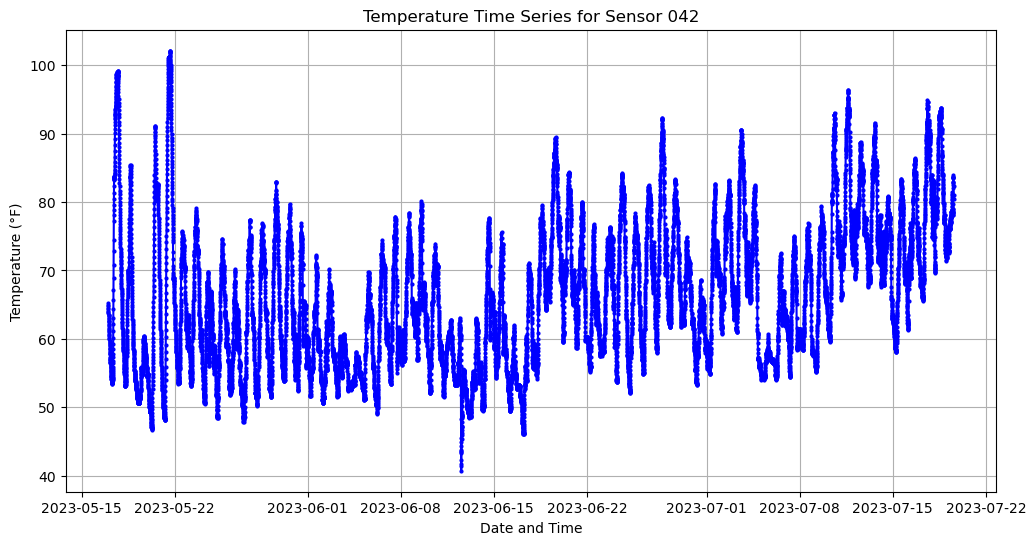

In [16]:
# Time series for each sensor
# and 'temp_fahrenheit' as the column to plot

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the time series
plt.plot(sensor_042.index, sensor_042['temp_fahrenheit'], color='b', linestyle='-', marker='o', markersize=2)

# Customize the plot
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Time Series for Sensor 042')
plt.grid(True)

# Show the plot
plt.show()
